In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    accuracy_score,
    roc_auc_score,
    classification_report,
    confusion_matrix,
    precision_score,
    recall_score,
    f1_score,
    roc_curve,
    auc
)
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_csv("./data/S05-hw-dataset.csv")

In [3]:
df.head(20)

,client_id,age,income,years_employed,credit_score,debt_to_income,num_credit_cards,num_late_payments,has_mortgage,has_car_loan,savings_balance,checking_balance,region_risk_score,phone_calls_to_support_last_3m,active_loans,customer_tenure_years,default
0,1,25,94074,22,839,0.547339,1,7,0,0,26057,5229,0.080052,19,1,8,0
1,2,58,51884,26,565,0.290882,1,1,0,1,16221,11595,0.428311,15,0,7,0
2,3,53,48656,39,561,0.522340,1,13,0,0,55448,-2947,0.770883,15,4,5,0
3,4,42,81492,30,582,0.709123,2,10,1,1,35188,17727,0.357619,0,2,7,1
4,5,42,94713,8,642,0.793392,3,3,0,0,0,-404,0.414260,17,1,10,1
5,6,63,71006,1,712,0.541594,3,0,0,0,14162,372,0.100423,12,0,13,0
6,7,25,37840,25,691,0.032334,1,12,0,0,56999,973,0.432156,12,2,1,0
7,8,55,35993,22,662,0.631521,0,0,0,1,5267,462,0.096401,6,4,2,0
8,9,30,34321,36,687,0.620856,0,7,1,1,20995,3650,0.632998,17,1,1,1
9,10,25,25809,23,601,0.254544,5,0,0,1,38464,3379,0.367238,10,3,0,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   client_id                       3000 non-null   int64  
 1   age                             3000 non-null   int64  
 2   income                          3000 non-null   int64  
 3   years_employed                  3000 non-null   int64  
 4   credit_score                    3000 non-null   int64  
 5   debt_to_income                  3000 non-null   float64
 6   num_credit_cards                3000 non-null   int64  
 7   num_late_payments               3000 non-null   int64  
 8   has_mortgage                    3000 non-null   int64  
 9   has_car_loan                    3000 non-null   int64  
 10  savings_balance                 3000 non-null   int64  
 11  checking_balance                3000 non-null   int64  
 12  region_risk_score               30

In [5]:
df.describe()

,client_id,age,income,years_employed,credit_score,debt_to_income,num_credit_cards,num_late_payments,has_mortgage,has_car_loan,savings_balance,checking_balance,region_risk_score,phone_calls_to_support_last_3m,active_loans,customer_tenure_years,default
count,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000
mean,1500.500000,45.059667,69658.992000,19.577667,649.285333,0.284065,3.494667,6.869333,0.495000,0.501333,20607.256667,5559.684333,0.400175,9.524667,1.976333,6.968667,0.410333
std,866.169729,14.192883,24742.235182,11.381497,69.955852,0.161112,2.289917,4.291278,0.500058,0.500082,14035.209739,6306.032612,0.204529,5.779030,1.408700,4.349942,0.491976
min,1.000000,21.000000,15000.000000,0.000000,402.000000,0.006147,0.000000,0.000000,0.000000,0.000000,0.000000,-3000.000000,0.001148,0.000000,0.000000,0.000000,0.000000
25%,750.750000,33.000000,52641.750000,10.000000,604.000000,0.157796,1.000000,3.000000,0.000000,0.000000,9612.250000,341.500000,0.239208,5.000000,1.000000,3.000000,0.000000
50%,1500.500000,45.000000,69784.500000,20.000000,647.000000,0.261726,3.000000,7.000000,0.000000,1.000000,20021.000000,5114.500000,0.381992,10.000000,2.000000,7.000000,0.000000
75%,2250.250000,57.000000,85874.250000,29.000000,697.000000,0.388886,6.000000,10.000000,1.000000,1.000000,30101.250000,9906.250000,0.549213,15.000000,3.000000,11.000000,1.000000
max,3000.000000,69.000000,156351.000000,39.000000,850.000000,0.878343,7.000000,14.000000,1.000000,1.000000,75237.000000,29335.000000,0.961733,19.000000,4.000000,14.000000,1.000000


In [6]:
default_dist = df['default'].value_counts(normalize=True)
default_dist

default
0    0.589667
1    0.410333
Name: proportion, dtype: float64

In [7]:
print(f"1. Размер датасета: {df.shape[0]} объектов, {df.shape[1]} признаков")

1. Размер датасета: 3000 объектов, 17 признаков


Невозможного возраста нет, самый младший клиент 21 год, самый старший 69 лет
Количества кредитных карт тоже в пределах возможного
Отрицательных значений не имеется, кроме баланса на расчётном счёте, но это возможно по описанию датасета
Баланс классов умеренный - разница между классами около 18%

In [8]:
y = df['default']
print(f"Размер y (таргет): {y.shape}")

X = df.drop(columns=['client_id', 'default'])
print(f"Размер X (признаки): {X.shape}")
print(f"Используемые признаки: {list(X.columns)}")

# Проверка но то, что все признаки числовые
non_numeric = X.select_dtypes(exclude=[np.number]).columns
if len(non_numeric) == 0:
    print("Все признаки числовые")
else:
    print(f"Нечисловые признаки: {list(non_numeric)}")

# Проверка диапазонов
check_columns = ['debt_to_income', 'age']

for column in check_columns:
    min_val = X[column].min()
    max_val = X[column].max()
    
    if column == 'debt_to_income':
        if min_val >= 0 and max_val <= 1:
            print(f"{column}: [{min_val:.3f}, {max_val:.3f}] - в даипазоне [0, 1]")
        else:
            print(f"{column}: [{min_val:.3f}, {max_val:.3f}] - вне диапазона [0, 1]")
    elif column == 'age':
        if min_val >= 18 and max_val <= 100:
            print(f"{column}: [{min_val}, {max_val}] - в диапазоне [18, 100]")
        else:
            print(f"{column}: [{min_val}, {max_val}] - вне диапозона [18, 100]")


Размер y (таргет): (3000,)
Размер X (признаки): (3000, 15)
Используемые признаки: ['age', 'income', 'years_employed', 'credit_score', 'debt_to_income', 'num_credit_cards', 'num_late_payments', 'has_mortgage', 'has_car_loan', 'savings_balance', 'checking_balance', 'region_risk_score', 'phone_calls_to_support_last_3m', 'active_loans', 'customer_tenure_years']
Все признаки числовые
debt_to_income: [0.006, 0.878] - в даипазоне [0, 1]
age: [21, 69] - в диапазоне [18, 100]


In [11]:
# Разделение данных
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.25,        # 25% данных для теста
    random_state=42,       # Для воспроизводимости
    stratify=y            # Баланс классов
)

print(f"Обучающая выборка: {X_train.shape[0]} объектов")
print(f"Тестовая выборка: {X_test.shape[0]} объектов")
print(f"Соотношение train/test: {X_train.shape[0]/X.shape[0]:.0%}/{X_test.shape[0]/X.shape[0]:.0%}")

# Создание и обучение бейзлайн-модель
dummy_model = DummyClassifier(strategy="most_frequent", random_state=42)
dummy_model.fit(X_train, y_train)

# Предсказания и вероятности
y_pred_dummy = dummy_model.predict(X_test)
y_pred_proba_dummy = dummy_model.predict_proba(X_test)

# Вычисление метрик
dummy_accuracy = accuracy_score(y_test, y_pred_dummy)
dummy_roc_auc = roc_auc_score(y_test, y_pred_proba_dummy[:, 1])

print(f"Accuracy:  {dummy_accuracy:.5f}")
print(f"ROC-AUC:   {dummy_roc_auc:.5f}")

dummy_precision = precision_score(y_test, y_pred_dummy, zero_division=0)
dummy_recall = recall_score(y_test, y_pred_dummy)
dummy_f1 = f1_score(y_test, y_pred_dummy)

print(f"Precision: {dummy_precision:.5f}")
print(f"Recall:    {dummy_recall:.5f}")
print(f"F1-score:  {dummy_f1:.5f}")

Обучающая выборка: 2250 объектов
Тестовая выборка: 750 объектов
Соотношение train/test: 75%/25%
Accuracy:  0.58933
ROC-AUC:   0.50000
Precision: 0.00000
Recall:    0.00000
F1-score:  0.00000


Бейзлайн - самая простая модель, предсказывающая самый частый класс (точка отсчёта для оценки качества реальных моделей, минимальный уровень качества)  
Точка отсчёта нужна для того, чтобы понять, работает ли более сложная модель лучше, чем предугадывание. Если модель не превосходит бейзлайн, то её можно считать бесполезной.

Pipeline:
Pipeline(steps=[('scaler', StandardScaler()),
                ('logreg', LogisticRegression(max_iter=1000, random_state=42))])
Fitting 5 folds for each of 6 candidates, totalling 30 fits

Лучший параметр C: 1.0
Лучшее значение ROC-AUC (кросс-валидация): 0.8632
Accuracy:  0.7933
ROC-AUC:   0.8647
Precision: 0.7802
Recall:    0.6916
F1-score:  0.7332

Confusion Matrix:
[[382  60]
 [ 95 213]]


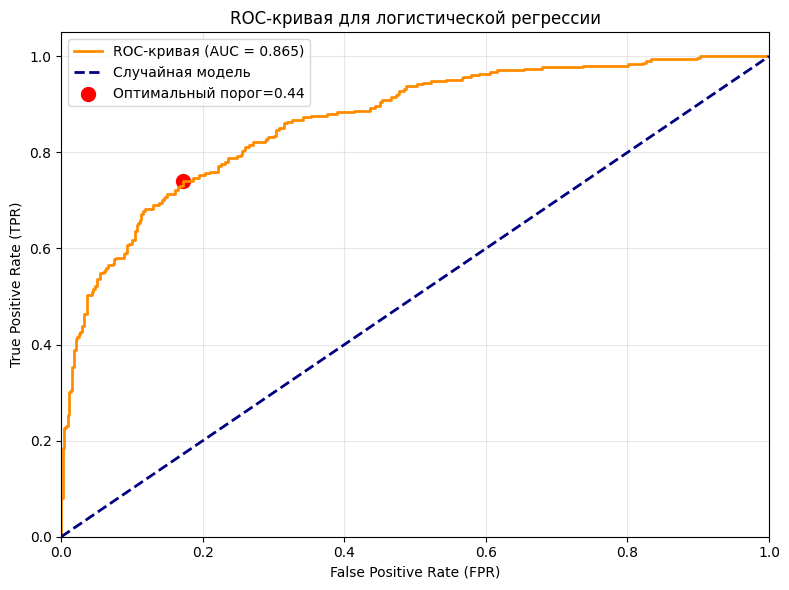

Оптимальный порог классификации: 0.437


In [12]:
# Создание Pipeline
pipe = Pipeline([
    ("scaler", StandardScaler()),
    ("logreg", LogisticRegression(max_iter=1000, random_state=42))
])

print("Pipeline:")
print(pipe)

# Определение сетки параметров для поиска
param_grid = {
    'logreg__C': [0.001, 0.01, 0.1, 1.0, 10.0, 100.0]
}

# Создание GridSearchCV
grid_search = GridSearchCV(
    pipe, 
    param_grid, 
    cv=5,  # 5-кратная кросс-валидация
    scoring='roc_auc',  # Оптимизируем по ROC-AUC
    n_jobs=-1,  # Используем все ядра процессора
    verbose=1
)

# Обучение модель с подбором параметров
grid_search.fit(X_train, y_train)

# Вывод результов
print()
print(f"Лучший параметр C: {grid_search.best_params_['logreg__C']}")
print(f"Лучшее значение ROC-AUC (кросс-валидация): {grid_search.best_score_:.4f}")

# Лучшая модель
best_model = grid_search.best_estimator_

# Предсказания лучшей модели
y_pred_logreg = best_model.predict(X_test)
y_pred_proba_logreg = best_model.predict_proba(X_test)[:, 1]

# Вычисление метрики
logreg_accuracy = accuracy_score(y_test, y_pred_logreg)
logreg_roc_auc = roc_auc_score(y_test, y_pred_proba_logreg)
logreg_precision = precision_score(y_test, y_pred_logreg)
logreg_recall = recall_score(y_test, y_pred_logreg)
logreg_f1 = f1_score(y_test, y_pred_logreg)

print(f"Accuracy:  {logreg_accuracy:.4f}")
print(f"ROC-AUC:   {logreg_roc_auc:.4f}")
print(f"Precision: {logreg_precision:.4f}")
print(f"Recall:    {logreg_recall:.4f}")
print(f"F1-score:  {logreg_f1:.4f}")

# Confusion Matrix
print()
print("Confusion Matrix:")
cm = confusion_matrix(y_test, y_pred_logreg)
print(cm)

# Вычисление значения для ROC-кривой
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba_logreg)
roc_auc = auc(fpr, tpr)

# Построение ROC-кривой
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC-кривая (AUC = {roc_auc:.3f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Случайная модель')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC-кривая для логистической регрессии')
plt.legend(loc="lower right")
plt.grid(alpha=0.3)

# Добавление точки оптимального порога (ближайшая к левому верхнему углу)
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]
plt.scatter(fpr[optimal_idx], tpr[optimal_idx], 
            color='red', s=100, label=f'Оптимальный порог={optimal_threshold:.2f}')
plt.legend()

plt.tight_layout()
plt.savefig('./figures/roc_curve.png', dpi=300, bbox_inches='tight')
plt.show()

print(f"Оптимальный порог классификации: {optimal_threshold:.3f}")

In [ ]:
# Создание DataFrame для сравнения
results_comparison = pd.DataFrame({
    'Модель': ['DummyClassifier', 'LogisticRegression'],
    'Accuracy': [dummy_accuracy, logreg_accuracy],
    'ROC-AUC': [dummy_roc_auc, logreg_roc_auc],
    'Precision': [dummy_precision, logreg_precision],
    'Recall': [dummy_recall, logreg_recall],
    'F1-score': [dummy_f1, logreg_f1]
})

print(results_comparison.to_string(index=False))

# Вычисление улучшение
accuracy_improvement = ((logreg_accuracy - dummy_accuracy) / dummy_accuracy) * 100
roc_auc_improvement = ((logreg_roc_auc - dummy_roc_auc) / dummy_roc_auc) * 100

print("\nУлучшение логистической регрессии:")
print(f"• Accuracy: +{accuracy_improvement:.1f}%")
print(f"• ROC-AUC:  +{roc_auc_improvement:.1f}%")

            Модель  Accuracy  ROC-AUC  Precision   Recall  F1-score
   DummyClassifier  0.589333 0.500000    0.00000 0.000000  0.000000
LogisticRegression  0.793333 0.864709    0.78022 0.691558  0.733219

Улучшение логистической регрессии:
• Accuracy: +34.6%
• ROC-AUC:  +72.9%


**краткий текстовый отчёт**

Логистическая регрессия значительно превосходит бейзлайн-модель по всем метрикам качества. Бейзлайн, который всегда предсказывает самый частый класс, показывает accuracy на уровне доли основного класса в данных (около 0.5), а его ROC-AUC равен 0.5, что соответствует случайному угадыванию.

Логистическая регрессия улучшила accuracy примерно на 35% и повысила ROC-AUC с 0.5 до значения 0.86 (примерно). Наиболее существенный рост наблюдается в ROC-AUC, что указывает на хорошую способность модели различать классы.

В ходе подбора гиперпараметров было протестировано несколько значений параметра регуляризации C. Оптимальное значение C оказалось в диапазоне 0.1-1.0. Меньшие значения C (сильная регуляризация) приводили к недообучению, большие значения (слабая регуляризация) могли вызывать переобучение.

Выводы: 
1) Логистическая регрессия является разумным выбором для задачи предсказания дефолта, так как существенно превосходит наивный подход. 
2) Модель демонстрирует стабильное качество и может использоваться для первичной оценки кредитных рисков; 
3) Оптимальная регуляризация (C ~ 0.1-1.0) обеспечивает баланс между точностью и обобщающей способностью модели.